In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

1. Do a greater number of restaurants provide online delivery as opposed to offline services?
2. Which types of restaurants are the most favored by the general public?
3. What price range is preferred by couples for their dinner at restaurants?

In [2]:
df = pd.read_csv("Zomato data .csv")

In [3]:
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet


In [4]:
def check_detail(dataframe):
    d = {'SHAPE': dataframe.shape,
        'COLUMNS': dataframe.columns,
        'INDEX': dataframe.index,
        'VALUE TYPES': dataframe.dtypes,
        'DUPLICATED VALUES': dataframe.duplicated().sum(),
        'NUMBER OF UNIQUE VALUES': dataframe.nunique(),
        'ANY MISSING VALUES': dataframe.isnull().values.any(),
        'MISSING VALUES': dataframe.isnull().sum(),
        'DESCRIBE.T': dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T}
    hashtags = '---------------------------'
    for key, val in d.items():
        print(f'{hashtags} {key} {hashtags}')
        print(val)
    print(f'{hashtags} {"LIST END"} {hashtags}')
   

check_detail(dataframe=df)

--------------------------- SHAPE ---------------------------
(148, 7)
--------------------------- COLUMNS ---------------------------
Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')
--------------------------- INDEX ---------------------------
RangeIndex(start=0, stop=148, step=1)
--------------------------- VALUE TYPES ---------------------------
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object
--------------------------- DUPLICATED VALUES ---------------------------
0
--------------------------- NUMBER OF UNIQUE VALUES ---------------------------
name                           145
online_order                     2
book_table                       2
rate          

In [5]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]))

In [6]:
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


In [7]:
def grab_col_names(df):
    # Separate columns into categorical and numerical
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    print(f'cat_col: {len(categorical_cols)}')
    print(f'num_col: {len(numerical_cols)}')

    return categorical_cols, numerical_cols

In [8]:
grab_col_names(df)

cat_col: 4
num_col: 3


(Index(['name', 'online_order', 'book_table', 'listed_in(type)'], dtype='object'),
 Index(['rate', 'votes', 'approx_cost(for two people)'], dtype='object'))

In [9]:
def identify_check(dataframe):
    print('-' * 80)
    print(f'Categorical : {categorical_cols}')
    print('-' * 80)
    print(f'Numerical : {numerical_cols}')


categorical_cols, numerical_cols = grab_col_names(df)
identify_check(df)

cat_col: 4
num_col: 3
--------------------------------------------------------------------------------
Categorical : Index(['name', 'online_order', 'book_table', 'listed_in(type)'], dtype='object')
--------------------------------------------------------------------------------
Numerical : Index(['rate', 'votes', 'approx_cost(for two people)'], dtype='object')


C:\Users\parha\AppData\Local\Temp\ipykernel_8148\3080763224.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['listed_in(type)'], palette='Set2')


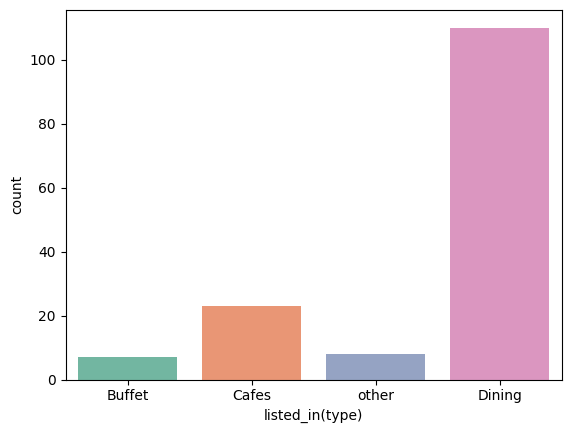

In [10]:
sns.countplot(x=df['listed_in(type)'], palette='Set2')
plt.show()

Conclusion: The majority of the restaurants fall into the dining category.

C:\Users\parha\AppData\Local\Temp\ipykernel_8148\257380088.py:3: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='listed_in(type)', y='count', data=df1, color='black', markers='o', linestyles='-', scale=0.5)


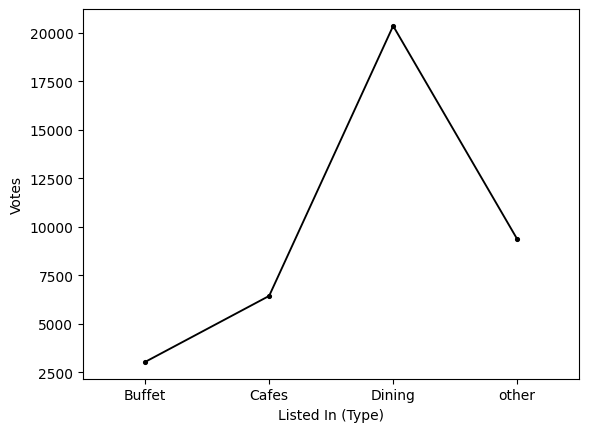

In [19]:
df1 = df.groupby('listed_in(type)')['votes'].sum().reset_index(name='count')

sns.pointplot(x='listed_in(type)', y='count', data=df1, color='black', markers='o', linestyles='-', scale=0.5)
plt.xlabel('Listed In (Type)')
plt.ylabel('Votes')
plt.show()



Conclusion: Dining restaurants are preferred by a larger number of individuals.

In [12]:
df.head(1)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet


Now we will determine the restaurant’s name that received the maximum votes based on a given dataframe.

In [24]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']
 
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


C:\Users\parha\AppData\Local\Temp\ipykernel_8148\2441925324.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'],palette='Set2')


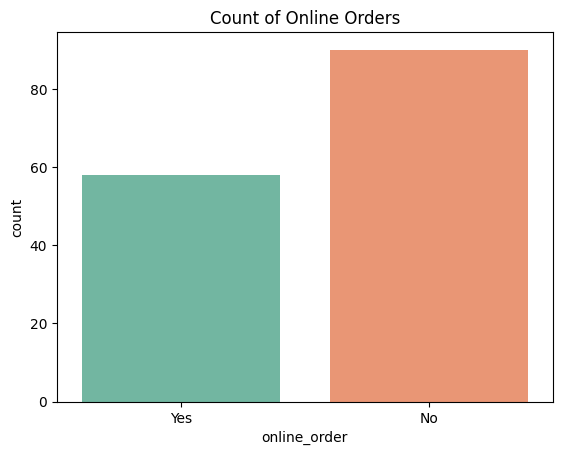

In [29]:
sns.countplot(x=df['online_order'],palette='Set2')
plt.title('Count of Online Orders')
plt.show()

Conclusion: This suggests that a majority of the restaurants do not accept online orders

In [30]:
df.head(1)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet


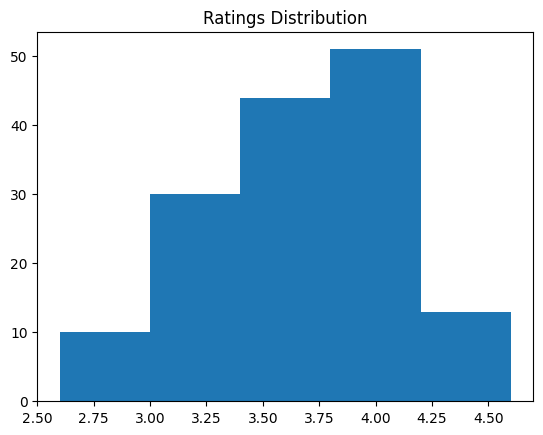

In [36]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.



Let’s explore the approx_cost(for two people) column.



C:\Users\parha\AppData\Local\Temp\ipykernel_8148\2503964735.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['approx_cost(for two people)'],palette='Set2')


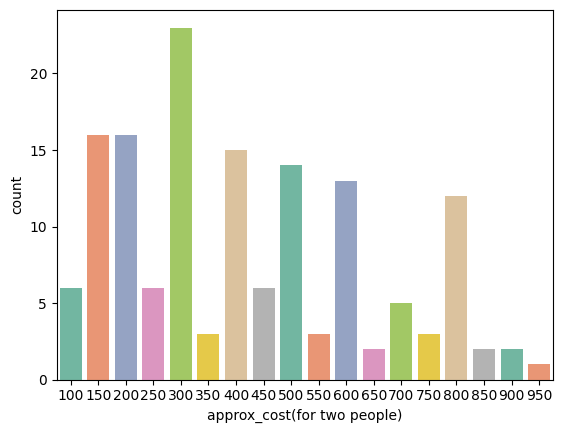

In [39]:
sns.countplot(x=df['approx_cost(for two people)'],palette='Set2')
plt.show()

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

<Axes: xlabel='online_order', ylabel='rate'>

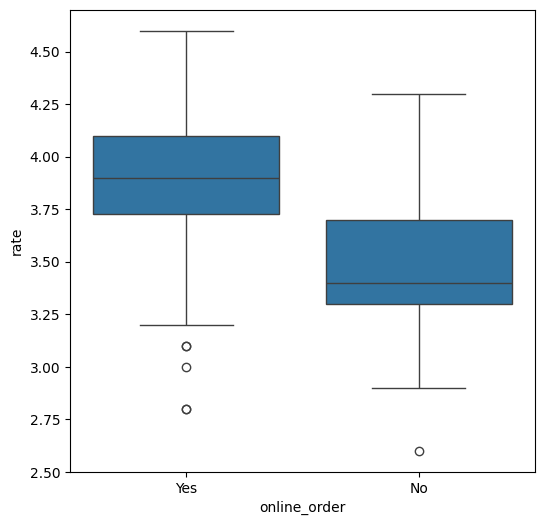

In [47]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

CONCLUSION: Offline orders received heigher ratings.

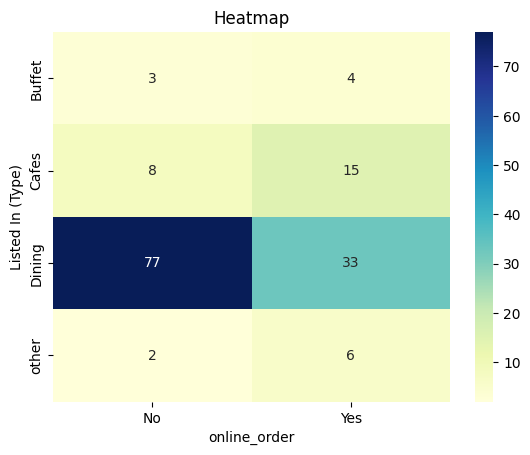

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


In [50]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.ylabel("Listed In (Type)")
plt.show()
pivot_table

CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.